## CMPINF 2100 Week 10 | Regression Performance Metrics

We will calculate the performace metrics for a LINEAR MODEL but these metrics can be used even if you are using more advanced models for REGRESSION.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

### Read Data

We will use the LINEAR RELATIONSHIP data set for this notebook.

In [3]:
df = pd.read_csv('week_10_linear_data.csv')

In [4]:
df

,x,trend,y,true_intercept,true_slope,true_sigma
0,-3.00,4.750,6.030315,0.25,-1.5,1.25
1,-2.25,3.625,1.457911,0.25,-1.5,1.25
2,-1.50,2.500,2.388383,0.25,-1.5,1.25
3,-0.75,1.375,0.007815,0.25,-1.5,1.25
4,0.00,0.250,0.651244,0.25,-1.5,1.25
5,0.75,-0.875,-2.254007,0.25,-1.5,1.25
6,1.50,-2.000,-2.969992,0.25,-1.5,1.25
7,2.25,-3.125,-3.537097,0.25,-1.5,1.25
8,3.00,-4.250,-6.063282,0.25,-1.5,1.25


### Fit the Linear Model

In [7]:
lm_fit = smf.ols(formula='y ~ x', data=df).fit()

In [8]:
lm_fit.params

Intercept   -0.476523
x           -1.696400
dtype: float64

In [9]:
lm_fit.bse

Intercept    0.370031
x            0.191083
dtype: float64

In [10]:
lm_fit.pvalues

Intercept    0.238754
x            0.000047
dtype: float64

In [12]:
lm_fit.conf_int().\
rename(columns={0: 'ci_lwr', 1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,-1.351507,0.39846
x,-2.148239,-1.24456


In [20]:
def my_coefplot( mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')

    plt.show()

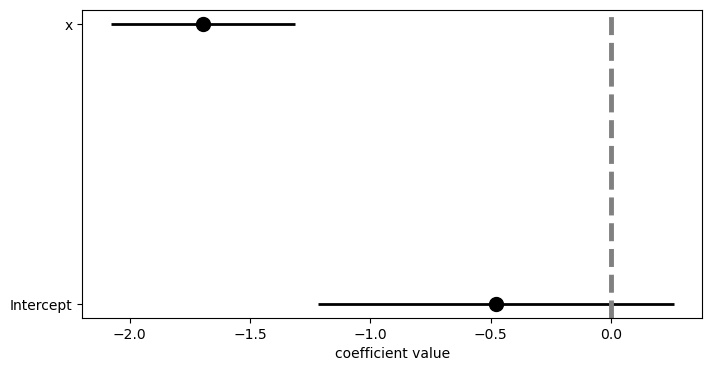

In [21]:
my_coefplot(lm_fit, figsize_use=(8, 4))

### Measure Performance

What is the 'goodness of fit' of the model on the TRAINING data.

The predictions on the TRAINING data are stored within the fitted model object. The TRAINING set predictions are commonly called the model 'FITS' or the FITTED VALUES

In [22]:
lm_fit.fittedvalues

0    4.612676
1    3.340376
2    2.068076
3    0.795777
4   -0.476523
5   -1.748823
6   -3.021123
7   -4.293422
8   -5.565722
dtype: float64

We could visually compare the MODEL FITTED VALUES or TRAINING PREDICTIONS to the OVERSERVED OUTPUTS.

In [23]:
df_copy = df.loc[:, ['x', 'y']].copy()

In [24]:
df_copy

,x,y
0,-3.00,6.030315
1,-2.25,1.457911
2,-1.50,2.388383
3,-0.75,0.007815
4,0.00,0.651244
5,0.75,-2.254007
6,1.50,-2.969992
7,2.25,-3.537097
8,3.00,-6.063282


In [25]:
df_copy['fitted']= lm_fit.fittedvalues

In [27]:
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


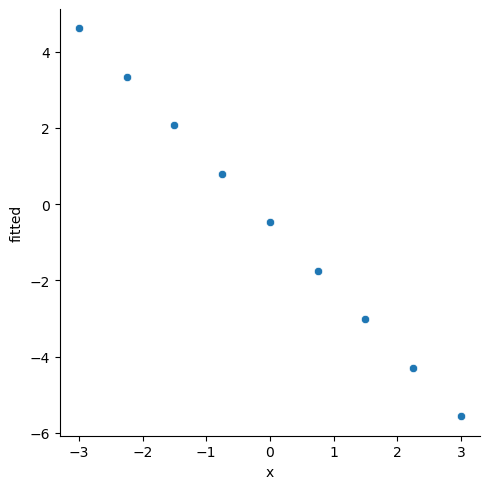

In [28]:
sns.relplot(data = df_copy, x='x', y='fitted')

plt.show()

To compare the OBSERVED OUTPUT to the MODEL FITS... one approach is to overlay the observed OUTPUIT vs the INPUT with the PREDICTED TREND or FITTED VALUES with the input.

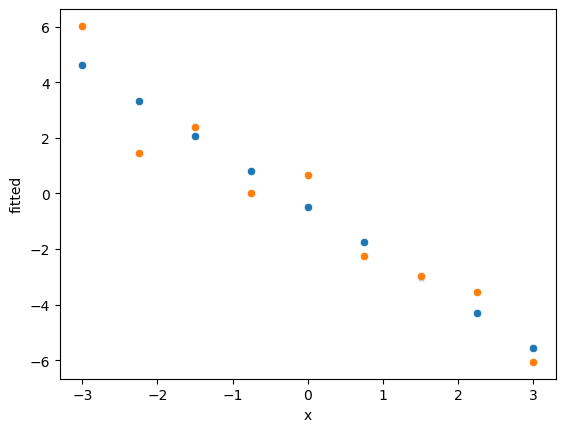

In [29]:
fig, ax = plt.subplots()

sns.scatterplot(data = df_copy, x='x', y='fitted', ax=ax)

sns.scatterplot( data = df_copy, x='x', y='y', ax=ax)

plt.show()

Instead, it is easier to DIRECTLY relate the OBSERVED OUTPUT and the MODEL FITS.

This kind of scatter plot is so important it has its own name.

It's called the PREDICTIVE vs OBSERVED figure!

In [30]:
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


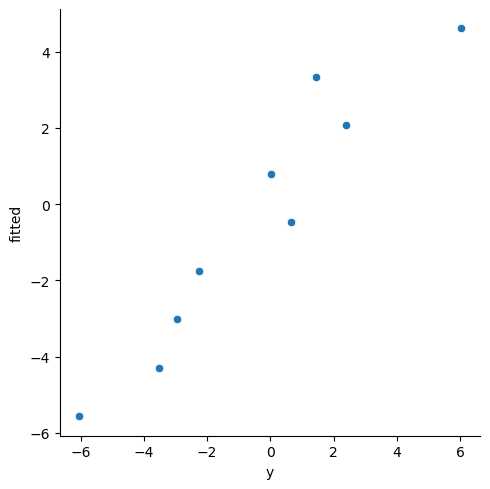

In [32]:
sns.relplot(data = df_copy, x='y', y='fitted')

plt.show()

Let's inmclude a '45 degree' reference line with our PREDICTED vs OBSERVED figure.

The easiest way to include this additional refrence line is to use SEABORN Axis level functions rather than FIGURE level functions.

In [37]:
sns.set_style('whitegrid')

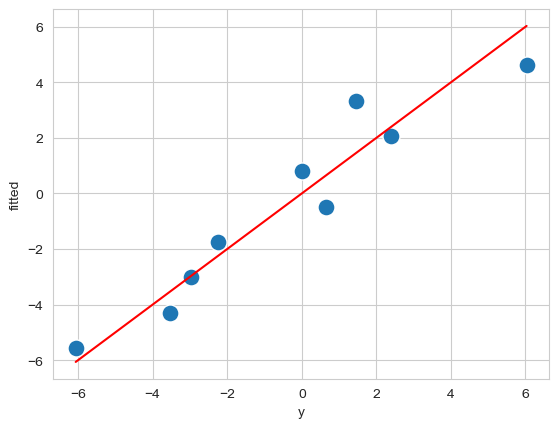

In [38]:
fig, ax = plt.subplots()

sns.scatterplot( data=df_copy, x='y', y='fitted', s=150, ax=ax)

sns.lineplot( data=df_copy, x='y', y='y', color='red', ax=ax)

plt.show()

By quite often we want a NUMBER or a QUANTITIVE metric for the **CORRELATION** between the model predictions and the observed output. This single number can be quantified by calculating the CORRELATION COEFFICIENT between the model FITS and the observed OUTPUT.

In [39]:
df_copy.loc[:, ['y', 'fitted']].corr(numeric_only=True)

,y,fitted
y,1.000000,0.958347
fitted,0.958347,1.000000


In [40]:
df_copy.loc[:, ['y', 'fitted']].corr().iloc[0, 1]

0.9583473874664296

Correlation coefficient can be NEGATIVE or POSITIVE so let's SQUARE the correlation coefficient!

In [41]:
df_copy.loc[:, ['y', 'fitted']].corr().iloc[0, 1] ** 2

0.9184297150637308

In [42]:
lm_fit.rsquared

0.918429715063731

statsmodels calulates R-squared using a particular formula.

Ideally R-squared is equal 1 and a really bad model has an R-squared of 0.

But please be careful... we will see later when we work with sklearn that depending on the formula that you use... you can have NEGATIVE R-squared values...

But negative R-squared MAKES NO SENSE!

### Error or Residuals

The ERROR is the DIFFERENCE between the OBSERVED output and the PREDICTED TREND or FITTED VALUES.

In [43]:
df_copy

,x,y,fitted
0,-3.00,6.030315,4.612676
1,-2.25,1.457911,3.340376
2,-1.50,2.388383,2.068076
3,-0.75,0.007815,0.795777
4,0.00,0.651244,-0.476523
5,0.75,-2.254007,-1.748823
6,1.50,-2.969992,-3.021123
7,2.25,-3.537097,-4.293422
8,3.00,-6.063282,-5.565722


In [44]:
df_copy['errors'] = df_copy.y - df_copy.fitted

In [45]:
df_copy

,x,y,fitted,errors
0,-3.00,6.030315,4.612676,1.417639
1,-2.25,1.457911,3.340376,-1.882465
2,-1.50,2.388383,2.068076,0.320307
3,-0.75,0.007815,0.795777,-0.787961
4,0.00,0.651244,-0.476523,1.127767
5,0.75,-2.254007,-1.748823,-0.505184
6,1.50,-2.969992,-3.021123,0.051131
7,2.25,-3.537097,-4.293422,0.756326
8,3.00,-6.063282,-5.565722,-0.497560


We can visualize the ERRORS with respect to an INPUT.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


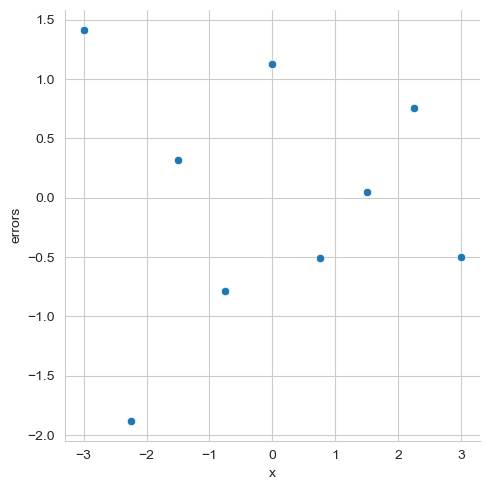

In [47]:
sns.relplot( data = df_copy, x='x', y='errors' )

plt.show()

Errors are so important that statsmodels object already stores them!

In [48]:
lm_fit.resid

0    1.417639
1   -1.882465
2    0.320307
3   -0.787961
4    1.127767
5   -0.505184
6    0.051131
7    0.756326
8   -0.497560
dtype: float64

In [50]:
df_copy['residuals'] = lm_fit.resid

In [51]:
df_copy

,x,y,fitted,errors,residuals
0,-3.00,6.030315,4.612676,1.417639,1.417639
1,-2.25,1.457911,3.340376,-1.882465,-1.882465
2,-1.50,2.388383,2.068076,0.320307,0.320307
3,-0.75,0.007815,0.795777,-0.787961,-0.787961
4,0.00,0.651244,-0.476523,1.127767,1.127767
5,0.75,-2.254007,-1.748823,-0.505184,-0.505184
6,1.50,-2.969992,-3.021123,0.051131,0.051131
7,2.25,-3.537097,-4.293422,0.756326,0.756326
8,3.00,-6.063282,-5.565722,-0.497560,-0.497560


The RESIDUALS or ERRORS can be calulated for EVERY data point... but we want to SUMMARIZE the ERROR or RESIDUAL ACROSS all the data points!

There are 2 common ways to summarize the ERRORS

The MOST common is to SQUARE the ERROR!

In [52]:
lm_fit.resid ** 2

0    2.009701
1    3.543673
2    0.102596
3    0.620883
4    1.271859
5    0.255211
6    0.002614
7    0.572029
8    0.247566
dtype: float64

We summarize the SQUARED ERROR!

SUMMING the SQUARED ERROR is known as the **SSE**

In [53]:
(lm_fit.resid ** 2).sum()

8.626133173634287

But... the SSE increases as the number of data points increases...

For those reasons we often **AVERAGE** the Squared ERRORS! This is referred to as the **MSE**

In [54]:
(lm_fit.resid ** 2).mean()

0.9584592415149208

The MSE is the OUTPUT units squared.

We apply the SQUARED ROOT to the MSE to produce an error metric in the same units as the OUTPUT!

The square root of MSE is known as the **RMSE**.

In [55]:
np.sqrt( (lm_fit.resid ** 2).mean() )

0.9790093163575722

The RMSE is essentially the SIGMA parameter that we defined when we generated the random data!

The other kind of important ERROR metric is based on the **ABSOLUTE ERROR**

In [56]:
np.abs( lm_fit.resid )

0    1.417639
1    1.882465
2    0.320307
3    0.787961
4    1.127767
5    0.505184
6    0.051131
7    0.756326
8    0.497560
dtype: float64

The **MEAN ABSOLUTE ERROR** or **MAE** is the average absolute error of the training data.

In [57]:
(np.abs( lm_fit.resid ) ) .mean()

0.8162599885208113

### Summary 

We have seen 2 types of performance metrics for Regression problems. 

We have seen the GENERAL linear relationship expressed in the PREDICTED vs OBSERVED figure quantified as R-squared.

We have also seen the ERROR metrics that **SUMMARIZE** the errors of a model. We can calculate those errors based on the SQUARED ERROR which is summarized as the MSE or RMSE. Or, we can calculate those errors based on the ABSOLUTE ERROR which summarized as the MAE.